#  Student Final Score Prediction — Regression Model
This notebook demonstrates how to **generate a regression dataset** and **build a machine learning model** to predict a student's final score based on study hours, attendance, and assignments.

We will cover:
1. Dataset Generation
2. Data Exploration
3. Feature Scaling
4. Train-Test Split
5. Model Training (Linear Regression)
6. Model Evaluation
7. Visualization (Actual vs Predicted)


##  Step 1: Generate Regression Dataset

In [219]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
# # Set seed for reproducibility
# np.random.seed(42)

# # -----------------------------
# # Create dataset (strong linear relationship)
# # -----------------------------
# n = 300

# # Features
# study_hours = np.random.uniform(2, 10, n).round(2)
# attendance = np.random.uniform(70, 100, n).round(1)
# assignments = np.random.randint(5, 10, n)
# quizzes_avg = np.random.uniform(60, 100, n).round(1)
# midterm_score = np.random.uniform(50, 95, n).round(1)

# # Final score = strong linear combination of all features
# final_score = (
#     4.5 * study_hours + 
#     0.8 * attendance + 
#     2.5 * assignments + 
#     1.2 * quizzes_avg + 
#     1.5 * midterm_score + 
#     np.random.normal(0, 2, n)   # small noise
# )

# # Normalize to 0–100 scale
# final_score = np.clip(final_score / final_score.max() * 100, 0, 100).round(2)

# # Create DataFrame
# df = pd.DataFrame({
#     "Study_Hours": study_hours,
#     "Attendance(%)": attendance,
#     "Assignments_Completed": assignments,
#     "Quizzes_Avg": quizzes_avg,
#     "Midterm_Score": midterm_score,
#     "Final_Score": final_score
# })

# # Display correlation
# print(df.corr()['Final_Score'].sort_values(ascending=False))

# # Save dataset
# df.to_csv("high_accuracy_regression_dataset.csv", index=False)
# print("\n Dataset saved as high_accuracy_regression_dataset.csv")


In [220]:
df = pd.read_csv("high_accuracy_regression_dataset.csv")
df.head()


,Study_Hours,Attendance(%),Assignments_Completed,Quizzes_Avg,Midterm_Score,Final_Score
0,5.00,71.6,9,78.4,88.9,84.41
1,9.61,85.9,6,82.3,83.0,88.60
2,7.86,86.2,8,94.4,73.5,88.59
3,6.79,89.1,6,81.4,89.1,88.80
4,3.25,91.8,9,67.4,61.0,72.18


##  Step 2: Explore and Summarize Dataset

In [221]:
# View dataset structure and summary statistics
print(df.info())
print('\nSummary Statistics:\n', df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Study_Hours            300 non-null    float64
 1   Attendance(%)          300 non-null    float64
 2   Assignments_Completed  300 non-null    int64  
 3   Quizzes_Avg            300 non-null    float64
 4   Midterm_Score          300 non-null    float64
 5   Final_Score            300 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 14.2 KB
None

Summary Statistics:
        Study_Hours  Attendance(%)  Assignments_Completed  Quizzes_Avg  \
count   300.000000     300.000000             300.000000   300.000000   
mean      5.961767      85.325000               6.953333    80.981333   
std       2.354987       9.078455               1.432245    11.508934   
min       2.040000      70.300000               5.000000    60.000000   
25%       3.915000      77.475000    

##  Step 3: Feature Selection and Scaling

In [222]:
from sklearn.preprocessing import StandardScaler

# Define features and target

X = df[["Study_Hours", "Attendance(%)", "Assignments_Completed", "Quizzes_Avg", "Midterm_Score"]]
y = df["Final_Score"]

# Apply scaling
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)
# print('Scaled feature sample:\n', X_scaled[:5])

# Feature Correlation Matrix

Correlation with Final_Score:
Final_Score              1.000000
Midterm_Score            0.714403
Quizzes_Avg              0.501811
Study_Hours              0.360371
Attendance(%)            0.138838
Assignments_Completed    0.104190
Name: Final_Score, dtype: float64


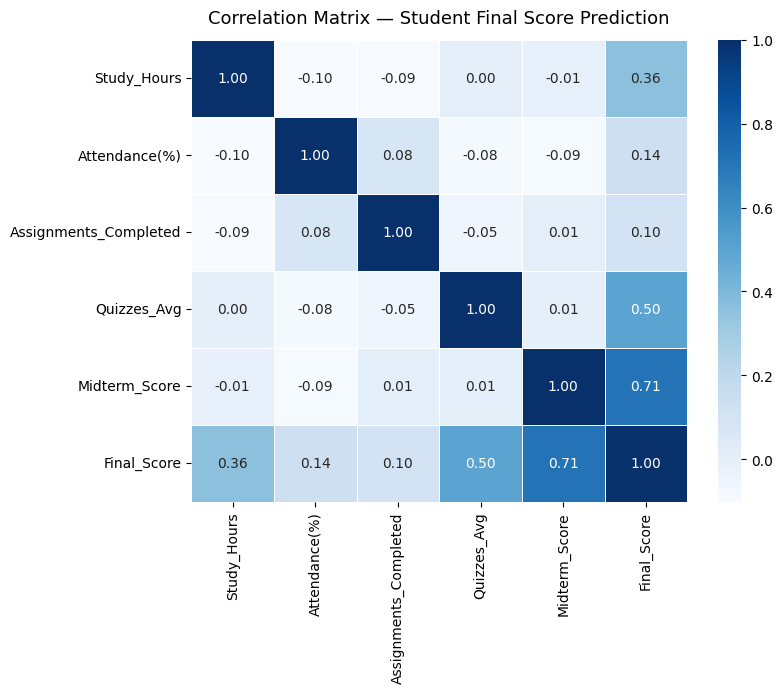

In [223]:
# Compute correlation matrix
corr = df.corr()

# Display correlation with target (sorted)
print("Correlation with Final_Score:")
print(df.corr()['Final_Score'].sort_values(ascending=False))

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='Blues', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix — Student Final Score Prediction", fontsize=13, pad=12)
plt.show()

##  Step 4: Split Dataset into Training and Testing Sets

In [224]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('Training set:', X_train.shape, '\tTesting set:', X_test.shape)

Training set: (240, 5) 	Testing set: (60, 5)


# Data Leakage Prevention

In [225]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

##  Step 5: Train Linear Regression Model

In [226]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2*100:.2f}%")


R² Score: 99.36%


##  Step 6: Evaluate Model Performance

In [227]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R² Score: {r2*100:.2f}%')

Mean Absolute Error (MAE): 0.42
Mean Squared Error (MSE): 0.26
R² Score: 99.36%


##  Step 7: Visualize Actual vs Predicted Results

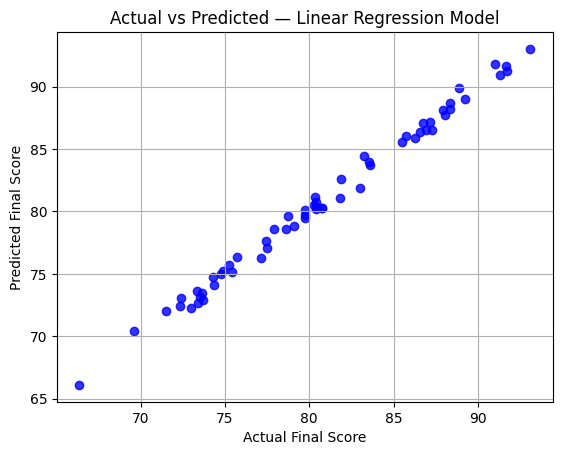

In [228]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.8, color='blue')
plt.xlabel('Actual Final Score')
plt.ylabel('Predicted Final Score')
plt.title('Actual vs Predicted — Linear Regression Model')
plt.grid(True)
plt.show()

# How About Random Regressor? Poor in this case

In [229]:
from sklearn.ensemble import RandomForestRegressor
model_random = RandomForestRegressor(n_estimators=100, random_state=42)
model_random.fit(X_train_scaled, y_train)


RandomForestRegressor(random_state=42)

In [230]:
y_pred1 = model_random.predict(X_test_scaled)
r2 = r2_score(y_test, y_pred1)
print(f"R² Score: {r2*100:.2f}%")

R² Score: 87.49%


##  Step 8: Save Preprocessed Dataset

In [231]:
df.to_csv('student_final_score_preprocessed.csv', index=False)
print('Preprocessed dataset saved successfully!')

Preprocessed dataset saved successfully!
